<a href="https://colab.research.google.com/github/AntonioHallgass/corso_AI_2025/blob/main/esame_30.6/MetodiAIFisica_ApplicazioniFisicheML_2025_ProvaPratica_30_6_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Pratica - Metodi AI per la fisica e Applicazioni Fisiche al ML
### 30.6.2026 - AA 2024/25 - Docenti: S. Giagu e A. Ciardiello

---

**Regole:**

*   **tempo a disposizione:** 3.0h

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano. L'esecuzione della cella scarica contesualmente il dataset da utilizzare durante la prova;
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito*.
*   una volta completato il compito scaricare il notebook in formato *.ipynb* e caricarlo usando il form:
[consegna notebook](https://docs.google.com/forms/d/e/1FAIpQLSekkv2tTVIIAyY15lc3a4px_yjxoQJ6INr6CuWiXNw1GccJoQ/viewform?usp=dialog)<p>


**NOTA 1:** per scaricare localmente il notebook da colab: menù **File->Dowload->Download .ipynb** (non è necessario cambiare il nome del file, il form associa automaticamnte il vostro nome / email al file che caricate)
<p>

**NOTA 2:** una volta caricato e sottomesso il notebook non sono più possibili ulteriori modifiche.

In [1]:
#@ Dati Personali
import os

Nome = 'Antonio'  #@param {type: "string"}
Cognome = 'Hallgass' #@param {type: "string"}
NumeroMatricola = 1977520 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!')
else:
  print('Download datasets ...')
  !wget http://giagu.web.cern.ch/giagu/CERN/gml_images.npz
  !ls
  print('Done')

Download datasets ...
--2025-06-30 12:13:31--  http://giagu.web.cern.ch/giagu/CERN/gml_images.npz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.185.5.88, 137.138.55.232, 188.185.50.104, ...
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.5.88|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://giagu.web.cern.ch/giagu/CERN/gml_images.npz [following]
--2025-06-30 12:13:32--  https://giagu.web.cern.ch/giagu/CERN/gml_images.npz
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.5.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304133499 (290M)
Saving to: ‘gml_images.npz’

gml_images.npz      100%[===================>] 290.04M  20.4MB/s    in 15s     

2025-06-30 12:13:48 (19.1 MB/s) - ‘gml_images.npz’ saved [304133499/304133499]

gml_images.npz	sample_data
Done


# Descrizione del compito:

Viene fornito un dataset in formato numpy compresso *gml_images.npz*, che contiene due array numpy:

*   images: 20000 esempi di immagini di shape $(64,64)$;
*   targets: 20000 target associati $y\in R^1$.


---

**Svolgere i seguenti quesiti:**

1. (Q0): leggere i due array e graficare 5 immagini con i target associati, formattati in una matrice di 3x3 plot
2. (Q1): **allenare** un modello basato su architettura CNN che predica il target associato a ciascuna immagine, e stimarne le prestazioni nel modo che si ritiene più opporuno;
3. (Q2): **allenare** la stessa architettura usata in Q1, modificata in modo da avere tutte le **attivazioni di tipo lineare**;
4. (Q3): **allenare** la stessa architettura usata in Q1, (**utilizzando lo stesso numero di epoche utilizzate nel punto Q1**), modificata in modo da avere tutte le **attivazioni di tipo sigmoide**;
5. (Q4): **allenare** la stessa architettura usata in Q1, ma inizializzando tutti i **pesi e i bias della rete ad un valore iniziale nullo (eg $=0.0$)**;
5. (Q5): spiegare le differenze incontrate nelle quattro configurazioni Q1, Q2, Q3 e Q4.

* commentare opportunamente i risultati ottenuti in ogni punto.

**Consigli**:

  1) R2 di Q1 va bene 0.7 (Non concentratevi a ottenere performance perfette)

  2)Commentare la presenza/assenza di overfitting nelle diverse configurazini

  3)Commentare la differenza di tempo necessario ad addestrare nelle diverse configurazioni

  4) Per confrontare le diverse configurazioni tenete gli iperparametri fissati

In [ ]:
# Questa funzione inizializza a zero tutti i pesi di layer lineari e conv2D
#def zero_weights(model):
#    for module in model.modules():
#        if isinstance(module, (nn.Linear, nn.Conv2d)):
#            if module.weight is not None:
#                nn.init.constant_(module.weight, 0.0)
#            if module.bias is not None:
#                nn.init.constant_(module.bias, 0.0)

# **Q0. LEGGERE E GRAFICARE**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [21]:
dati = np.load('gml_images.npz')
X = dati['images'] # o come li ha chiamati
y=dati['targets'] # o come li ha chiamati
print(X.shape)
print(y.shape)

(20000, 64, 64)
(20000,)
[2.5357101  2.02274394 0.22218999 ... 0.27840999 1.57140005 0.16833   ]
3.95261002


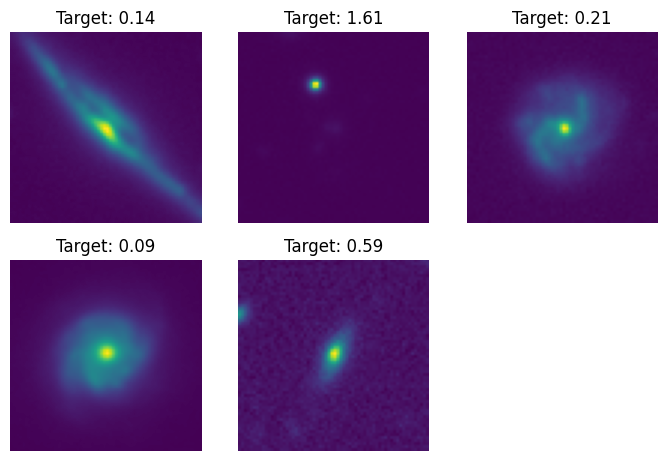

In [28]:
indices = np.random.choice(len(X), 5, replace=False)

fig = plt.figure(figsize=(7,7))
for i, idx in enumerate(indices):
    ax=fig.add_subplot(3, 3, i + 1)
    ax.imshow(X[idx])
    ax.set_title(f'Target: {y[idx]:.2f}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# **(Q1): MODELLO CNN**